# Classificador de câncer de mama

Neste projeto, usaremos um classificador K-Nearest Neighbor para prever se um paciente tem câncer de mama.

### Carregando o conjunto de dados

Vamos obter os dados de cancêr de mama do próprio `sklearn` importando a função `load_breast_cancer` do `sklearn.datasets`

In [1]:
from sklearn.datasets import load_breast_cancer

**1.** Depois de importar o conjunto de dados, vamos carregar os dados em uma variável chamada `dados_cancer_mama`. Faça isso configurando `dados_cancer_mama` igual à função `load_breast_cancer()`.

In [2]:
dados_cancer_mama = load_breast_cancer()

**2.** Antes de começarmos a criar nosso classificador, vamos dar uma olhada nos dados. Comece imprimindo `dados_cancer_mama.data[0]`. Esse é o primeiro ponto de dados em nosso conjunto. Mas o que todos esses números representam? Imprima também `dados_cancer_mama.feature_names`.

In [7]:
print(dados_cancer_mama.data[0])
print(dados_cancer_mama.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**3.** Agora temos uma noção de como são os dados, vamos verificar o que estamos tentando classificar? Vamos imprimir ambos `dados_cancer_mama.target` e `dados_cancer_mama.target_names`.

O primeiro ponto de dados foi marcado como maligno ou benigno?

In [8]:
print(dados_cancer_mama.target)
print(dados_cancer_mama.target_names)

# Resposta: maligno

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Dividindo os dados em conjuntos de treinamento e teste

**4.** Divida os dados em conjuntos de treinamento e teste usando o método `train_test_split()` do `sklearn`. Use um `test_size` de 0.2 e `random_state = 100`. Isso garantirá que toda vez que você executar seu código, os dados sejam divididos da mesma maneira.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dados_cancer_mama.data, dados_cancer_mama.target, test_size=0.2, random_state=100)

### Executando o KNN

**5.** Agora que criamos conjuntos de treinamento e teste, podemos criar um `KNeighborsClassifier` e testar sua precisão. Comece importando `KNeighborsClassifier` de `sklearn.neighbors`

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**6.** Crie um `KNeighborsClassifier` onde n_neighbors = 3. Nomeie o classificador como `knn`

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

**7.** Treine seu classificador usando a função `fit`. Esta função recebe dois parâmetros: o conjunto de treinamento e os rótulos de treinamento.

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**8.** Agora que o classificador foi treinado, vamos descobrir o quão preciso ele é no conjunto de teste. Chame a função `score` do classificador. `score` recebe dois parâmetros: o conjunto de teste e os rótulos de teste. Imprima o resultado!

In [14]:
print(f'Precisão: {knn.score(x_test, y_test)}')

Precisão: 0.9473684210526315


**9.** O classificador se sai muito bem quando `k = 3`. Mas talvez haja um `k` melhor. Teste o classificador knn com valores de `k` de `1` até `100`.
Qual `k` apresenta o melhor resultado?

In [15]:
import matplotlib.pyplot as plt

scores = []
for k in range(1, 101):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  scores.append(knn.score(x_test, y_test))

### Apresentando os resultados

**10.** Agora temos a precisão para 100 `k`s diferentes. Em vez de apenas imprimir, vamos fazer um gráfico usando `matplotlib`

O eixo x deve ser os valores `k` que testamos. Esta deve ser uma lista de números entre 1 e 100.

O eixo y do nosso gráfico deve ser a precisão do conjunto de teste.

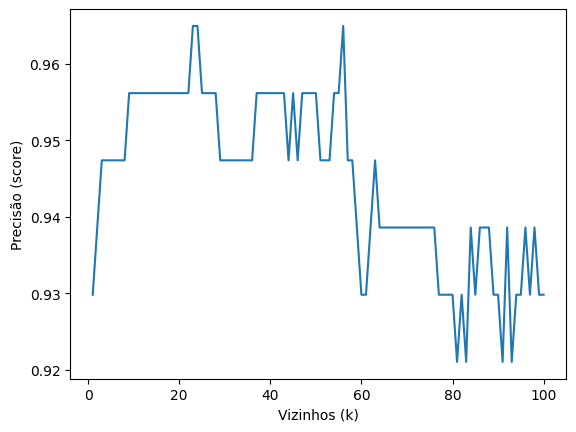

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(range(1, 101), scores)
plt.xlabel('Vizinhos (k)')
plt.ylabel('Precisão (score)')
plt.show()
plt.clf()

**11.** Imprima a matriz de confusão, utilizando os dados do conjunto de teste, do modelo com o `k` que obteve o maior `score` .

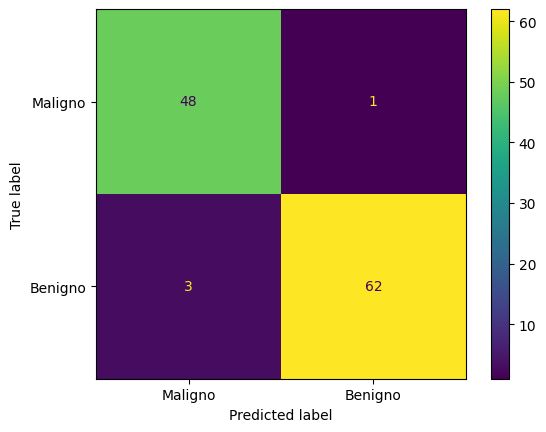

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

maior_score = scores.index(max(scores)) + 1

knn = KNeighborsClassifier(n_neighbors=maior_score)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Maligno', 'Benigno'])
disp.plot()
plt.show()
plt.clf()